<a href="https://colab.research.google.com/github/vishva2410/Spam-email-classification-SVM-/blob/main/svm_model_spam_email.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
df = pd.read_csv('spam.csv',encoding='latin-1')

In [ ]:
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [ ]:
 df.drop(columns=['Unnamed: 3','Unnamed: 4','Unnamed: 2'])

KeyError: "['Unnamed: 3', 'Unnamed: 4', 'Unnamed: 2'] not found in axis"

In [16]:
print(df) # removed the empty columns

        v1                                                 v2
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham              Will Ì_ b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


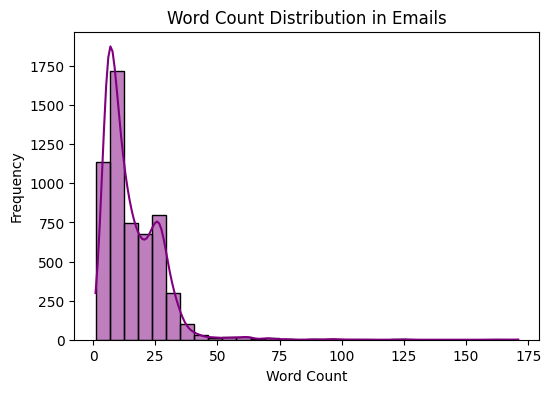

In [44]:
df['word_count'] = df['v2'].apply(lambda x: len(str(x).split()))  # Count words in each email

plt.figure(figsize=(6, 4))
sns.histplot(df['word_count'], bins=30, kde=True, color='purple')
plt.title("Word Count Distribution in Emails")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()


<ipython-input-47-a6a7c10d2b06>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['v1'], palette=['blue', 'red'])


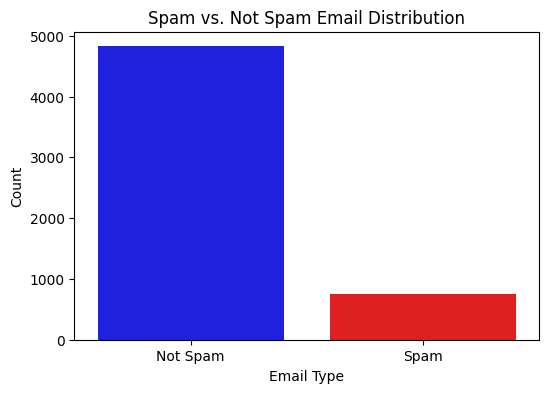

In [47]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['v1'], palette=['blue', 'red'])
plt.title("Spam vs. Not Spam Email Distribution")
plt.xlabel("Email Type")
plt.ylabel("Count")
plt.xticks([0, 1], ["Not Spam", "Spam"])
plt.show()


In [18]:
target = df['v1']
x = df.drop(columns = ['v2'])
y = df['v1']

In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
vec = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
x = vec.fit_transform(x)
# shows error bcz i did it twice he code is right

AttributeError: 'csr_matrix' object has no attribute 'lower'

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=22)

In [38]:
sc = SVC(kernel='linear')
sc.fit(x_train,y_train)

SVC(kernel='linear')

In [41]:
a = accuracy_score(y_train,sc.predict(x_train))
print('accuracy = ',a*100,'%')
print(classification_report(y_train,sc.predict(x_train)))

accuracy =  99.68089349820502 %
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4339
           1       1.00      0.98      0.99       675

    accuracy                           1.00      5014
   macro avg       1.00      0.99      0.99      5014
weighted avg       1.00      1.00      1.00      5014

